In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
import sys 
import os

parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_path not in sys.path:
    sys.path.insert(1, parent_path)
    
from src.categorical import CategoricalEmbedding, PCA, flip_signs, BlackSwanDetector

# Exploration

What is the behavior of the covariance matrix for binary data? We can divide this in two parts:
* Behavior of the variance of a binary random variable
* Behavior of the covariance between two binary random variable

### Variance of a Bernoulli rv

The distribution of a binary random variance is the Bernoulli distribution with the following properties:
* PMF: $ f(x) = \begin{cases} 1 - p &\text{if x = 0,} \\ p &\text{if x = 1}\end{cases}$
* Mean: $p$
* Variance: $p (1-p)$

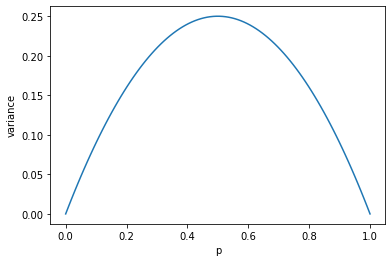

In [7]:
p = np.linspace(0, 1, 100)
y = p * (1 - p)

fig = plt.figure()
plt.plot(p, y)
plt.xlabel('p')
plt.ylabel('variance')
plt.show()

The variance goes down for small $p$. This means that categories that are dummy encoded and have relatively few ones compared to zeros (similar to a rv with low $p$) also have relatively low variance. 

### Covariance between two Bernoulli rv's

The covariance between two random variables is defined as $\sigma_{ab}=E[ab] - E[a]E[b]$. We can use the following estimators for each:
* $E[ab]=\sum_{i=0}^n 1_{a_i=1}1_{b_i=1}/n$
* $E[a]=\sum_{i=0}^n 1_{a_i=1}/n$
* $E[b]=\sum_{i=0}^n 1_{b_i=1}/n$

where $1_x$ is the indicator function that takes the value 1 if $x$ holds true and zero otherwise

In [115]:
def calc_cov(x, y):
    
    n = len(x)
    E_ab = np.sum(x * y) / n
    E_a = np.sum(x==1) / n
    E_b = np.sum(y==1) / n
    
    cov_emp = np.cov(x, y)[0, 1]
    cov_the = E_ab - E_a * E_b
    
    print('np.cov:      {}'.format(cov_emp))
    print('theoretical: {}'.format(cov_the))

In [166]:
def generate_xy(n, p1, p_overlap):

    x = np.random.binomial(1, p1, size=int(n))
    y = np.repeat(1, n)
    
    n_overlap = int(max(0, round(n * p_overlap)))
    y[:n_overlap] = x[:n_overlap]
    y[n_overlap:] = -x[n_overlap:] + 1
    
    return x, y

In [167]:
x, y = generate_xy(1e5, 0.9, 0.1)
print('p overlap:   {}'.format(sum(x == y) / len(x)))
print('p1:          {}'.format(sum(x) / len(x)))
print('p2:          {}'.format(sum(y) / len(y)))
print('----')
calc_cov(x, y)

p overlap:   0.1
p1:          0.90012
p2:          0.18042
----
np.cov:      -0.07213037170371733
theoretical: -0.07212965040000001


In [200]:
n_grid = 1000
p_overlap = np.linspace(0, 1, n_grid)
cov = np.empty(n_grid)

for i, po in enumerate(p_overlap):
    
    x, y = generate_xy(100, 0.9, po)
    cov[i] = np.cov(x, y)[1, 0]

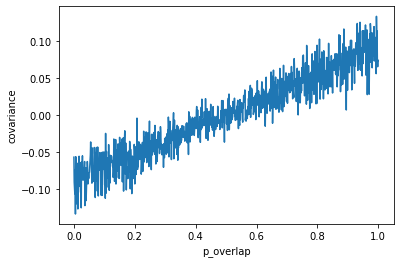

In [201]:
fig = plt.figure()
plt.plot(p_overlap, cov)
plt.xlabel('p_overlap')
plt.ylabel('covariance')
plt.show()